- Classification
- Applications of Classification
- Types of Classification
- Binary Classification
  * Logistic Regression
    * Mathematical Concept of Logistic Regression
    * Example with Breast Cancer Dataset
  * Performance Metrics Used in Classification
    * Significance of the Confusion Matrix
  * Naive Bayes Classifier
    * Mathematical Concept of Naive Bayes
    * Applying Naive Bayes Algorithm on Breast Cancer Dataset
  * K-Nearest Neighbors (KNN)
    * Applying K-Nearest Neighbors on Breast Cancer Dataset
    * Hyperparameter Tuning in KNN
  * Decision Tree
    * How Decision Trees Work
    * Metrics for Splitting
    * Pruning
    * Applying Decision Tree on Breast Cancer Dataset
    * Hyperparameter Tuning in Decision Tree
  * Support Vector Machine (SVM)
    * Applying SVM on Breast Cancer Dataset
    * Hyperparameter Tuning

# Classification
**Classifiaction** is a supervised machine learning technique where the model is trained to predict the class label of a given input data. It looks for a decision boundary, which divides the dataset into different classes. The Classification algorithms categorize data into distinct class or categories

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/Classification.png)

## Applications

- Healthcare - Models for disease diagnosis
- Finance - Fraud Detection, Credit Approval
- Marketing -  Identfying Potential Positive customers for a product
- Retail - Category of products to be in inventory
- Manufacturing - Quality Control

## Types of Classification


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Classification_Part_1/image_1.jpg)

# Binary Classification

Binary Classification is the most simplest type of classification, where the models tries to predict one of two possible outcomes for example Yes or No, True or False, Spam or Not Spam etc <br>
Popular Algorithms used for binary classification are:
- Logistic Regression
- Naive Bayes
- K Nearest Neighbors (KNN)
- Decision Trees
- Support Vector Machine (SVM)


While these methods excel in binary settings, they are equally capable of handling multi-class classification tasks. This versatility allows them to be used in a wider range of applications, such as recognizing multiple categories of objects in images or predicting several types of customer behavior.

# Logistic Regression
**Logistic regression** is a supervised machine learning technique primarily used for binary classification. In this method, we apply the sigmoid function to the linear combination of independent variables/predictors (features). This produces a probability value between 0 and 1. This probability represents the likelihood of a datapoint belonging to a specific class (e.g., positive or negative outcome).

If the estimated probability is
greater than equal to $\geq$ 0.5, then the model predicts that the instance belongs to a positive class labeled “1” or else it predicts that it does not (i.e., it
belongs to the negative class, labeled “0”). This makes it a binary classifier.

## **Mathematical Concept of Logistic Regression:**

**1. Logistic Function (Sigmoid Function):**

The core of logistic regression is the logistic function, also known as the sigmoid function (denoted by $\sigma(z)$), which maps any real-valued number into the range (0, 1).
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where,
 `z` is a linear combination of the input features. This function outputs the probability of the input belonging to the positive class (class 1).
 
**2. Linear Combination of Inputs:**

The input features 𝑋 are combined linearly using weights 𝑤 and a bias term 𝑏:
$$
z = w \cdot X + b
$$

**3. Prediction:**

The logistic regression model predicts the probability of the class being positive or negative (class 1 or class 0) as:
$$
\sigma(z) = P(y=1 \mid X) = \frac{1}{1 + e^{-(w \cdot X + b)}}
$$

To make a final binary decision, a threshold (usually 0.5) is applied to this probability. If 𝜎(𝑧)≥0.5, the prediction is class 1; otherwise, it's class 0.

**4. Cost Function:**

The cost function used in logistic regression is the binary cross-entropy (log loss), which measures the discrepancy between the predicted probabilities and the actual class labels:
$$
J(w, b) = -\frac{1}{m} \sum_{i=1}^m \left[ y_{(i)} \log(\hat{y}_{(i)}) + (1 - y_{(i)}) \log(1 - \hat{y}_{(i)}) \right]
$$

Where
𝑚 is the number of training examples, $y_{(i)}$ is the true label, and $\hat{y}_{(i)}$ is the predicted probability for the $𝑖^{th}$ example.

**5. Optimization:**

The goal is to find the weights 𝑤 and bias 𝑏 that minimize the cost function. This is typically done using gradient descent.

### **Dataset Description:**
 The Breast Cancer Wisconsin (Diagnostic) dataset is a widely used dataset in the field of machine learning, particularly in classification problems related to medical diagnosis.This dataset consists of breast cancer cases derived from a group of patients who underwent surgery and had their breast mass tissue sampled.
**Number of Instances:** It contains 569 instances, each representing an individual sample of breast tissue.
**Number of Attributes:** There are 30 numeric attributes computed from digitized images of the tissue samples. These attributes are measurements of the cell nuclei present in the images.\

**The attributes include:**
- Radius (mean of distances from center to points on the perimeter)
- Texture (standard deviation of gray-scale values)
- Perimeter
- Area
- Smoothness (local variation in radius lengths)
- Compactness (perimeter^2 / area - 1.0)
- Concavity (severity of concave portions of the contour)
- Concave points (number of concave portions of the contour)
- Symmetry
- Fractal dimension ("coastline approximation" - 1)
- The target variable, `diagnosis`, indicates the cancer type, which can be "M" (Malignant) or "B" (Benign). The objective is to predict whether the tissue sample is benign or malignant

**Note:** We will use this dataset to explore and compare various binary classification algorithms, examining how their performance varies depending on the type and implementation of each algorithm, accompanied by their mathematical explanations.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [4]:
# Load Data
df = pd.read_csv('Breast_cancer_dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#Unnamed: 32, id appears to be irrelevant with respect the prediction task Hence Dropping them

df = df.drop(columns = ['Unnamed: 32', 'id'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
# Check for missing values
df.isnull().sum().sum()

0

There are no missing values in the dataset

In [8]:
# Statistical summary
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Dataset appears to be following near normal distribution but not in standardized. Data Standardization is required. There are few outliers present in the data. verify and treat outliers if present

In [9]:
## Target value Distribution
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

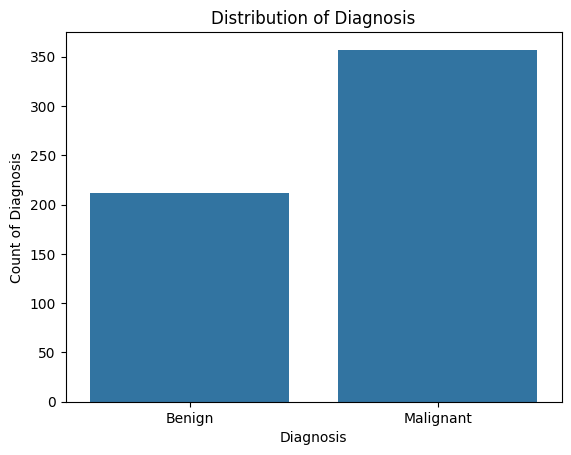

In [10]:
sns.countplot(x =  'diagnosis', data  = df)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count of Diagnosis')
plt.xticks([0,1],['Benign', 'Malignant'])
plt.show()

Plot a correlation heatmap to understand the realtionship between features
- This Visualizes the correlation between different features, identifying highly correalted features

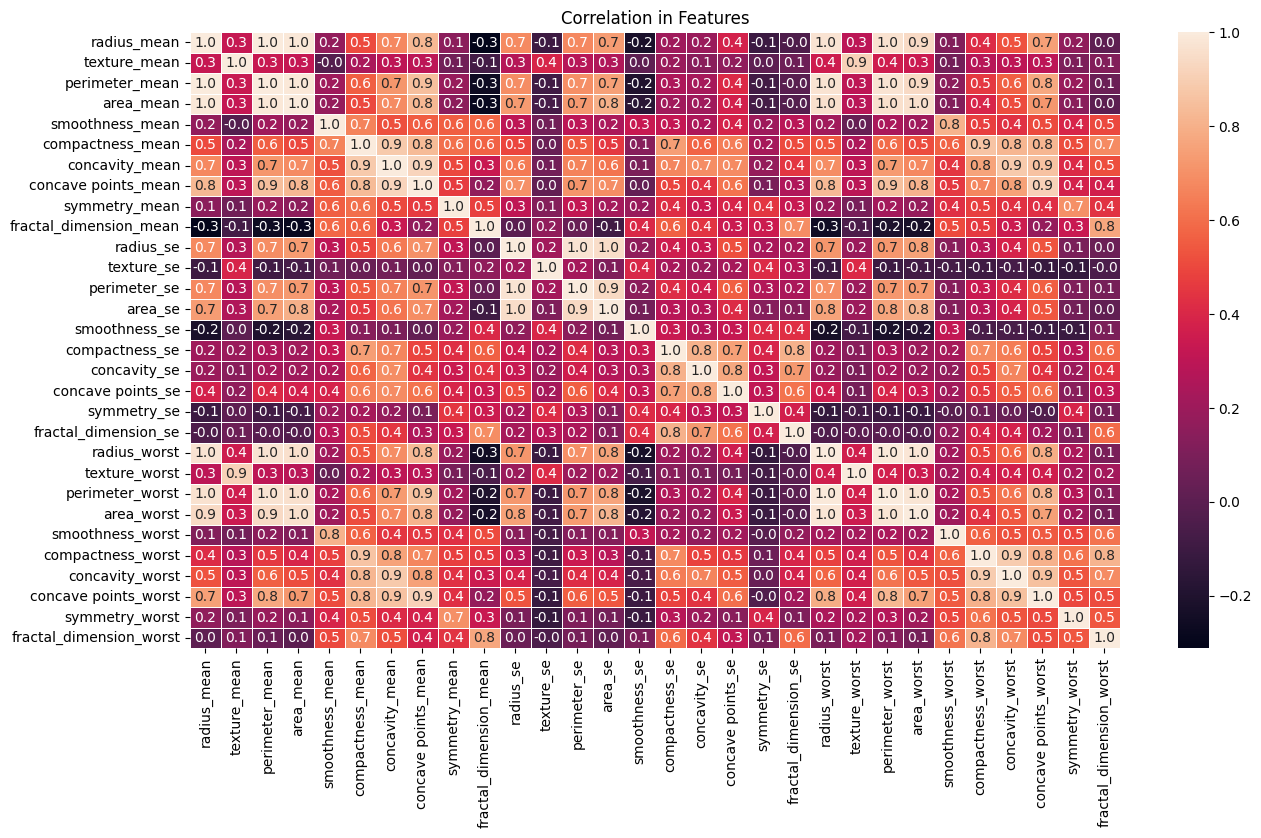

In [11]:
plt.figure(figsize = (15, 8))
c =  df.corr(numeric_only = True)
sns.heatmap(c, annot = True, fmt = ".1f", linewidths = 0.5)
plt.title('Correlation in Features')
plt.show()

### __Observation:__
- High Correlations: Several pairs of features exhibit strong positive correlations.
For example, `radius_mean`, `perimeter_mean`, and `area_mean` are highly correlated with each other. This is expected as these are all measures of size and dimensions of the detected tumors.
- Feature Groups: Features related to the "worst" (largest value of these features for each image), "mean", and "error" (standard error) calculations are grouped together, indicating that similar types of measurements are highly correlated. For example, `radius_worst`, `perimeter_worst`, and `area_worst` also show very high positive correlations.
- Clinical Relevance: High correlations between features like `concavity_mean` and `concave points_mean` suggest that more concave portions of the tumor outline correspond to more frequent concave points, which are relevant characteristics for diagnosing malignancy of the sample.

In [12]:
# Transform Target Variable using Label Encoding

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['diagnosis'] = enc.fit_transform(df['diagnosis'])
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [13]:
## Split Feature and target and do train test splitin 80:20

x = df.drop(columns = ['diagnosis'])
y = df['diagnosis']

x_train, x_test, y_train, y_test  =  train_test_split(x, y, test_size = 0.2, random_state = 42)

In [14]:
# Define the pipeline
pipeline =  Pipeline([
    ('impute',SimpleImputer(strategy = 'median')), 
    ('stdsc', StandardScaler()), 
    ('log_reg', LogisticRegression())
])

pipeline.fit(x_train,y_train)

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('stdsc', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [15]:
# predict for training and test data
y_pred_train_log_reg = pipeline.predict(x_train)
y_pred_test_log_reg = pipeline.predict(x_test)


## Predict probabilities on test set

y_pred_test_prob_log_reg =  pipeline.predict_proba(x_test)[:,1]

In [16]:
y_pred_test_prob_log_reg

array([1.13590250e-01, 9.99990991e-01, 9.96920905e-01, 5.10134225e-04,
       6.06389713e-05, 1.00000000e+00, 9.99999998e-01, 9.65096937e-01,
       3.79342140e-01, 7.59402734e-04, 4.98717826e-02, 9.87592879e-01,
       6.07381873e-03, 8.56069117e-01, 1.62175599e-03, 9.99259818e-01,
       1.85245908e-03, 1.11662359e-05, 8.18375684e-07, 9.99998883e-01,
       8.41633901e-02, 9.74778299e-03, 9.99999996e-01, 7.89186669e-05,
       1.13874333e-03, 5.84587240e-04, 1.07444521e-03, 5.97518345e-03,
       2.85311713e-03, 9.99991817e-01, 5.17409813e-04, 1.48760128e-04,
       2.16094439e-03, 5.49413839e-03, 1.40706288e-04, 2.42334266e-03,
       9.42415985e-01, 2.89870352e-03, 9.99911214e-01, 4.81363757e-02,
       7.12433090e-05, 9.99593392e-01, 2.46640626e-03, 9.63884505e-04,
       1.99892051e-02, 7.15547342e-02, 3.98571939e-04, 4.90625569e-04,
       3.04698010e-02, 6.14016147e-04, 9.99879654e-01, 9.99999947e-01,
       3.08211520e-01, 1.32293769e-02, 2.73627242e-05, 9.54524359e-03,
      

Create a DataFrame with actual labels, predicted label and predicted probability. The probability of positive class that is malignant is obtained, to further evaulate performance metrics

In [ ]:
results_df = pd.DataFrame({
    'Actual Label': y_test, 
    'Predicted Label' : y_pred_test_log_reg, 
    'Predicted Probability(Class 1)' :  y_pred_test_prob_log_reg
    })
results_df.head(10)

,Actual Label,Predicted Label,Predicted Probability(Class 1)
204,0,0,0.113590
70,1,1,0.999991
131,1,1,0.996921
431,0,0,0.000510
540,0,0,0.000061
567,1,1,1.000000
369,1,1,1.000000
29,1,1,0.965097
81,0,0,0.379342
477,0,0,0.000759


In [19]:
## Calculate The accuracy score
train_accuracy =  accuracy_score(y_train, y_pred_train_log_reg)
test_accuracy =  accuracy_score(y_test, y_pred_test_log_reg)

print('_'*50)
print('Logistic Regression')
print(f'Training Accuracy : {train_accuracy * 100:.2f}%')
print(f'Testing Accuracy : {test_accuracy * 100:.2f}%')

__________________________________________________
Logistic Regression
Training Accuracy : 98.68%
Testing Accuracy : 97.37%


__Observation:__
- **Training Accuracy (98.68%):**
  Indicates that the logistic regression model correctly classifies 98.68% of the training instances.
  A high training accuracy suggests that the model has learned the patterns present in the training data well.
- **Testing Accuracy (97.37%):**
  This indicates that the model correctly classifies 97.37% of the instances in the test set, which was not seen during training.
  High testing accuracy suggests that the model generalizes well to new, unseen data.
- **Model Performance:**
  Both training athe logistic regression model.
  The slight drop from training to testing accuracy (from 98.68% to 97.37%) is expected and acceptable, showing that the model generalizes well without overfitting.
- **Check for Overfitting:**
  If the training accuracy were significantly higher than the testing accuracy, it would suggest overfitting. However, in this case, the difference is small, indicating that the model is not overfitting.nd testing accuracies are high, indicating good overall performance of model


 **Note:** Accuracy is a good starting point for evaluating a model, but it's important to understand that it doesn't tell the whole story. Let's introduce various other evaluation metrics that provide more detailed insights into the model's performance.

# __Date: 11-07-2025__

## Performance Metrics used in Classification
A Performance Evaluation matrix, referred as confusion matrix in the context of classification problems is the tool to assess the performance of the predictive model by comparing the actual outcomes with the predicted outcomes. it is tabular representation that allows to visualize accuracy and errors.<br>
in Binary Class Classification a Confusion Matrix is essentially a 2x2 Matrix
The matrix includes the following components:
- **True Positive (TP):** The number of instances where the model correctly predicted the positive class.
- **True Negative (TN):** The number of instances where the model correctly predicted the negative class.
- **False Positive (FP):** The number of instances where the model incorrectly predicted the positive class (Type I error).
- **False Negative (FN):** The number of instances where the model incorrectly predicted the negative class (Type II error)


![link_text](https://images.prismic.io/encord/edfa849b-03fb-43d2-aba5-1f53a8884e6f_image5.png?auto=compress,format)



## Accuracy Score
The Ratio of correctly predicted instances(both positive and Negative) to the total instances
$$ \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{FP} + \text{TN} +\text{FN}}$$
## Precision
The Ratio of correctly predicted positive instances to the total positive predictions
$$ \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$
- it indicates the quality of positive predictions
- it is a ggod metric to consider when the cost of false positive is high
## Recall or Sensitivity or True Positive Rate
The Ratio of correctly predicted positive instances to the Actual positive instances
$$ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

- it measure the models ability to detect positive class.
- it is a good metric to consider when the cost of false Negative is high
## F1 Score
The Harmonic mean of precision and recall. its a single metric that balances tradeoff between precision and recall
$$
\text{F1 Score} =  2 \times \frac{\text{Precision}\times \text{Recall}}{\text{Precision} + \text{Recall}}
$$
## Specificity or True Negative Rate
The Ratio of correctly predicted negative instances to the Actual negative instances
$$ \text{Specificity} = \frac{\text{TN}}{ \text{TN} + \text{FP} }$$
- it measure the models ability to detect positive class.
- it is a good metric to consider when the cost of false Negative is high


# ROC Curve - Receiver Operating Characterstics Curve
An ROC curve is a graphical representation of a classification model’s performance across different classification thresholds. It plots the True Positive Rate (Recall) against the False Positive Rate (FPR) at various threshold settings.

True Positive Rate (TPR) or Recall:
$$ \text{TPR} = \frac{TP}{TP + FN} $$
False Positive Rate (FPR):
$$\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}$$
**Finding the Optimal Threshold:**
The default threshold for many classification algorithms is 0.5, meaning if the predicted probability is greater than 0.5, the instance is classified as positive. However, this threshold may not always be optimal, especially in cases with skewed class distributions or when the costs of false positives and false negatives are unequal.


**Methods to Find the Optimal Threshold:**

1. *Maximizing Youden’s J Statistic*:
  Youden's J statistic is defined as
  $J=TPR−FPR$. The optimal threshold is where this statistic is maximized. This method balances the TPR and FPR, aiming to maximize the true positives while minimizing the false positives.
2. *Closest Point to (0, 1)*:
  Another method is to find the point on the ROC curve that is closest to the top-left corner (0, 1), representing the ideal classifier with TPR = 1 and FPR = 0.

# AUC - Area under the ROC Curve
The AUC is a single scalar value that summarizes the overall performance of a classifier.
<br>
**AUC Value**
- An AUC of 0.5 suggests no discrimination, meaning the model performs no better than random chance.
- An AUC of 1.0 indicates perfect discrimination, meaning the model perfectly distinguishes between positive and negative classes.

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import classification_report, roc_curve, auc

Confusion Matrix
[[70  1]
 [ 2 41]]


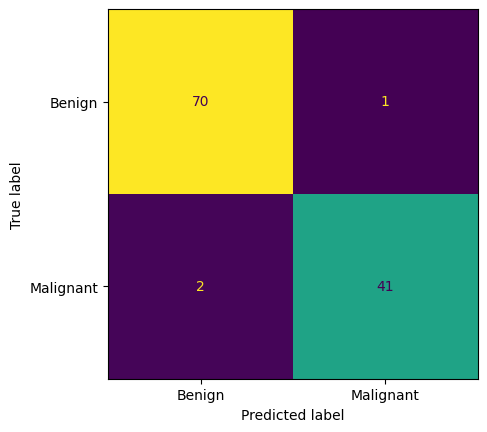

Classfication Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [21]:
conf_mat =  confusion_matrix(y_test, y_pred_test_log_reg)
print('Confusion Matrix')
print(conf_mat)

cm_display = ConfusionMatrixDisplay(confusion_matrix =  conf_mat, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False)
plt.show()

print('Classfication Report')
print(classification_report(y_test, y_pred_test_log_reg))

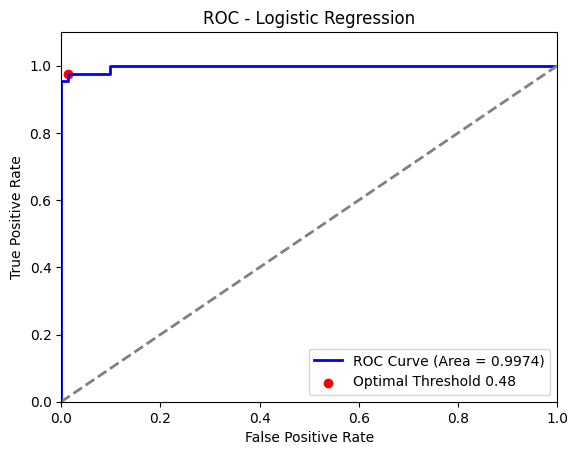

In [22]:
#Plot ROC Curve
fpr, tpr, thresholds =  roc_curve(y_test, y_pred_test_prob_log_reg)
# Compute AUC
roc_auc = auc(fpr,tpr)

## Calculate Youden J Statistic
J =  tpr- fpr
optimal_threshold_idx =  np.argmax(J)
optimal_thresh =  thresholds[optimal_threshold_idx]

## plot curve
plt.plot(fpr, tpr, color = 'blue', lw =2, label = f'ROC Curve (Area = {roc_auc:.4f})')
plt.scatter(fpr[optimal_threshold_idx], tpr[optimal_threshold_idx], color = 'red', 
           label = f'Optimal Threshold {optimal_thresh:.2f}')
plt.plot([0,1], [0,1], color = 'grey', lw =2, linestyle ='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Logistic Regression')
plt.legend(loc= 'lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.show()



Confusion Matrix
[[70  1]
 [ 1 42]]


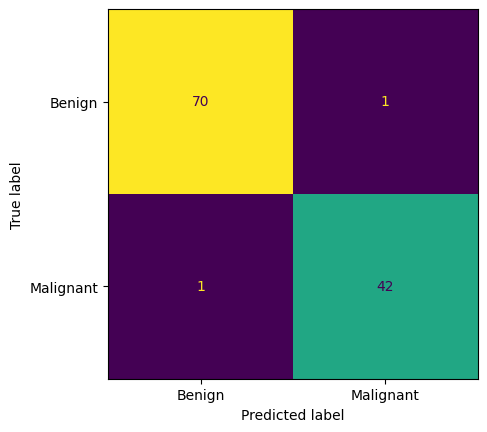

Classfication Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [23]:
results_df['Predicted48'] =  list(map(lambda x: 1 if x>=optimal_thresh else 0 , 
                                 results_df['Predicted Probability(Class 1)']))


conf_mat =  confusion_matrix(y_test, results_df['Predicted48'].values)
print('Confusion Matrix')
print(conf_mat)

cm_display = ConfusionMatrixDisplay(confusion_matrix =  conf_mat, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False)
plt.show()

print('Classfication Report')
print(classification_report(y_test, results_df['Predicted48'].values))

In [24]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB

In [25]:
# Define the pipeline
pipeline =  Pipeline([
    ('impute',SimpleImputer(strategy = 'median')), 
    ('stdsc', StandardScaler()), 
    ('log_reg', GaussianNB())
])

pipeline.fit(x_train,y_train)

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('stdsc', StandardScaler()), ('log_reg', GaussianNB())])

In [26]:
# predict for training and test data
y_pred_train_gnb = pipeline.predict(x_train)
y_pred_test_gnb = pipeline.predict(x_test)


## Predict probabilities on test set

y_pred_test_prob_gnb =  pipeline.predict_proba(x_test)[:,1]

In [29]:
y_pred_test_prob_gnb


array([1.34948255e-09, 1.00000000e+00, 1.00000000e+00, 9.80109091e-12,
       8.10256814e-15, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       9.87950441e-01, 2.64849636e-15, 4.46800030e-14, 1.00000000e+00,
       6.08337623e-13, 1.00000000e+00, 4.57056936e-15, 1.00000000e+00,
       1.84972586e-13, 1.30910975e-18, 3.53635858e-15, 1.00000000e+00,
       2.09551972e-05, 2.94554413e-14, 1.00000000e+00, 9.82160094e-19,
       2.30935453e-16, 1.52071981e-10, 6.31863321e-14, 8.07274975e-13,
       9.82584807e-15, 1.00000000e+00, 3.33148815e-14, 5.38869550e-18,
       6.21992947e-08, 5.76814951e-14, 3.03976484e-16, 5.62985207e-16,
       6.58454030e-01, 2.75799994e-13, 1.00000000e+00, 4.57410842e-10,
       3.86663903e-16, 1.00000000e+00, 1.73939924e-12, 2.33899832e-16,
       4.46000038e-06, 1.33718798e-13, 3.44818365e-10, 1.16526622e-16,
       3.81059759e-12, 2.36430356e-12, 1.00000000e+00, 1.00000000e+00,
       2.59709559e-02, 4.11221200e-04, 2.64455070e-13, 8.20049245e-14,
      

In [ ]:
results_df = pd.DataFrame({
    'Actual Label': y_test, 
    'Predicted Label' : y_pred_test_gnb, 
    'Predicted Probability(Class 1)' :  y_pred_test_prob_gnb
    })
results_df.head(10)

,Actual Label,Predicted Label,Predicted Probability(Class 1)
204,0,0,1.349483e-09
70,1,1,1.000000e+00
131,1,1,1.000000e+00
431,0,0,9.801091e-12
540,0,0,8.102568e-15
567,1,1,1.000000e+00
369,1,1,1.000000e+00
29,1,1,1.000000e+00
81,0,1,9.879504e-01
477,0,0,2.648496e-15


In [31]:
## Calculate The accuracy score
train_accuracy =  accuracy_score(y_train, y_pred_train_gnb)
test_accuracy =  accuracy_score(y_test, y_pred_test_gnb)

print('_'*50)
print('Logistic Regression')
print(f'Training Accuracy : {train_accuracy * 100:.2f}%')
print(f'Testing Accuracy : {test_accuracy * 100:.2f}%')

__________________________________________________
Logistic Regression
Training Accuracy : 93.63%
Testing Accuracy : 96.49%


Confusion Matrix
[[70  1]
 [ 3 40]]


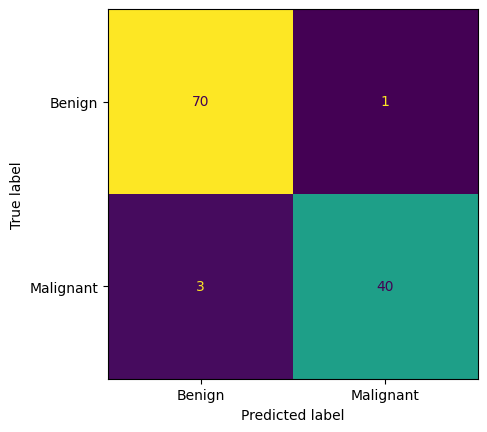

Classfication Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [32]:
conf_mat =  confusion_matrix(y_test, y_pred_test_gnb)
print('Confusion Matrix')
print(conf_mat)

cm_display = ConfusionMatrixDisplay(confusion_matrix =  conf_mat, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False)
plt.show()

print('Classfication Report')
print(classification_report(y_test, y_pred_test_gnb))

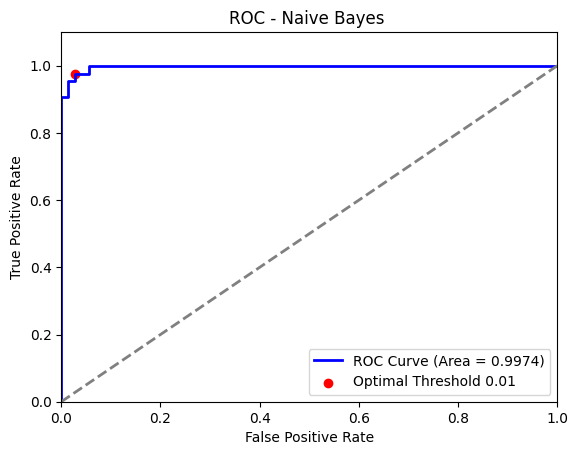

In [34]:
#Plot ROC Curve
fpr, tpr, thresholds =  roc_curve(y_test, y_pred_test_prob_gnb)
# Compute AUC
roc_auc = auc(fpr,tpr)

## Calculate Youden J Statistic
J =  tpr- fpr
optimal_threshold_idx =  np.argmax(J)
optimal_thresh =  thresholds[optimal_threshold_idx]

## plot curve
plt.plot(fpr, tpr, color = 'blue', lw =2, label = f'ROC Curve (Area = {roc_auc:.4f})')
plt.scatter(fpr[optimal_threshold_idx], tpr[optimal_threshold_idx], color = 'red', 
           label = f'Optimal Threshold {optimal_thresh:.2f}')
plt.plot([0,1], [0,1], color = 'grey', lw =2, linestyle ='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Naive Bayes ')
plt.legend(loc= 'lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.show()



In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
# Define the pipeline
pipeline =  Pipeline([
    ('impute',SimpleImputer(strategy = 'median')), 
    ('stdsc', StandardScaler()), 
    ('log_reg', KNeighborsClassifier(n_neighbors=9))
])

pipeline.fit(x_train,y_train)

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('stdsc', StandardScaler()),
                ('log_reg', KNeighborsClassifier(n_neighbors=9))])

In [82]:
# predict for training and test data
y_pred_train_KNN = pipeline.predict(x_train)
y_pred_test_KNN = pipeline.predict(x_test)


## Predict probabilities on test set

y_pred_test_prob_KNN =  pipeline.predict_proba(x_test)[:,1]

In [83]:
y_pred_test_prob_KNN

array([0.        , 1.        , 0.88888889, 0.        , 0.        ,
       1.        , 1.        , 0.88888889, 0.66666667, 0.        ,
       0.11111111, 0.88888889, 0.11111111, 0.55555556, 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.11111111, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.77777778, 0.        , 1.        , 0.11111111,
       0.        , 1.        , 0.        , 0.        , 0.11111111,
       0.11111111, 0.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 0.77777778, 0.11111111, 0.        ,
       0.        , 0.        , 1.        , 0.88888889, 0.        ,
       0.        , 1.        , 1.        , 0.11111111, 0.        ,
       0.11111111, 1.        , 1.        , 0.        , 0.        ,
       0.77777778, 1.        , 0.        , 1.        , 0.     

In [84]:
results_df = pd.DataFrame({
    'Actual Label': y_test, 
    'Predicted Label' : y_pred_test_gnb, 
    'Predicted Probability(Class 1)' :  y_pred_test_prob_KNN
    })
results_df.head(10)

,Actual Label,Predicted Label,Predicted Probability(Class 1)
204,0,0,0.000000
70,1,1,1.000000
131,1,1,0.888889
431,0,0,0.000000
540,0,0,0.000000
567,1,1,1.000000
369,1,1,1.000000
29,1,1,0.888889
81,0,1,0.666667
477,0,0,0.000000


In [85]:
## Calculate The accuracy score
train_accuracy =  accuracy_score(y_train, y_pred_train_KNN)
test_accuracy =  accuracy_score(y_test, y_pred_test_KNN)

print('_'*50)
print('KNN accuracy')
print(f'Training Accuracy : {train_accuracy * 100:.2f}%')
print(f'Testing Accuracy : {test_accuracy * 100:.2f}%')

__________________________________________________
KNN accuracy
Training Accuracy : 97.80%
Testing Accuracy : 96.49%


Confusion Matrix
[[69  2]
 [ 3 40]]


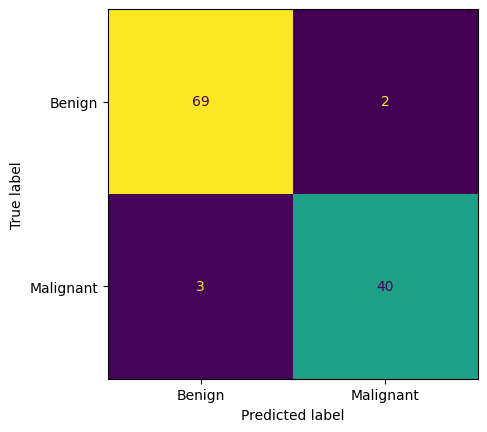

Classfication Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [79]:
conf_mat =  confusion_matrix(y_test, y_pred_test_KNN)
print('Confusion Matrix')
print(conf_mat)

cm_display = ConfusionMatrixDisplay(confusion_matrix =  conf_mat, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False)
plt.show()

print('Classfication Report')
print(classification_report(y_test, y_pred_test_KNN))

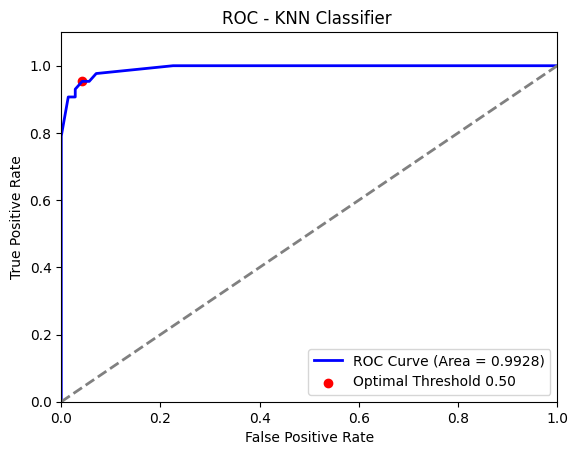

In [80]:
#Plot ROC Curve
fpr, tpr, thresholds =  roc_curve(y_test, y_pred_test_prob_KNN)
# Compute AUC
roc_auc = auc(fpr,tpr)

## Calculate Youden J Statistic
J =  tpr- fpr
optimal_threshold_idx =  np.argmax(J)
optimal_thresh =  thresholds[optimal_threshold_idx]

## plot curve
plt.plot(fpr, tpr, color = 'blue', lw =2, label = f'ROC Curve (Area = {roc_auc:.4f})')
plt.scatter(fpr[optimal_threshold_idx], tpr[optimal_threshold_idx], color = 'red', 
           label = f'Optimal Threshold {optimal_thresh:.2f}')
plt.plot([0,1], [0,1], color = 'grey', lw =2, linestyle ='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - KNN Classifier ')
plt.legend(loc= 'lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.show()



In [ ]:
## hyper tunning 

# grid search CV
